# Reading in the simulation data
Simulation data for every trial was stored in a .sav-file, which is a pickle file created directly from python after each run.
Besides the .sav-file, there is also a .json file which contains the same information as the .sav-file, but Python is not necessarily needed to read the results.

This Notebook will show basics on how to get the data from the pickle-files.

## Structure
The folder following folders are important:
- 30s Trials
- 1800s Trials
- 1800s Trials interrupted
- Fluid Model
- Volumeflow Demand

The abbreviations are as followed:
- MPC: Model Predictive Control
- DMPC: Decentralized Model Predictive Control
- MADRL: Multi-Agent Reinforcement Learning
- MM: Market Mechanism

## Import libraries
First, necessary libraries (Pickle, os and numpy) will be imported

In [3]:
import pickle
import numpy as np
import os

Specify the path to the file you want to load.

In [4]:
sav_path = "./30s_Trials/DMPC_NN_3iter/complete_dict.sav"
sav_path = os.path.normpath(sav_path)

In [5]:
with open(sav_path, 'rb') as pickle_file:
    data = pickle.load(pickle_file)

## Pickle Content
After loading the dict, you can see it has several keys.
'Mas_history' describes the history of the global parameters (see later), 'agent_histories' the data of the agents. 'Agent_names' defines the names of the agents in a list.

In [6]:
data.keys()

dict_keys(['mas_history', 'agent_histories', 'agent_names', 'pump_idx', 'valve_idx', 'agents_ls', 'agents_color', 'last_time', 'agents_observed_states', 'agents_names'])

'pump_idx' and 'valve_idx' specify which agent is a pump and which a valve:

In [7]:
data['pump_idx'], data['valve_idx']

([0, 1], [2, 3, 4, 5, 6])

'agents_ls' and 'agents_color' give each agent a linestyle and a color to reproduce the exact plots every time:

In [8]:
data['agents_ls'], data['agents_color']

(['--', '--', '-', '-', '-', '-', '-'],
 [(0, 0.31, 0.45),
  (0.91, 0.31, 0.24),
  (0.69, 0.8, 0.31),
  (0.93, 0.48, 0.2),
  (0.31, 0.71, 0.58),
  (0.54, 0.54, 0.54),
  (0.99, 0.79, 0)])

### IMPORTANT
'last_time', 'agents_observed_states' and 'agents_names' were only used by the Python code used for simulating and can be ignored.

## MAS History
In the MAS History, global reward and computation time are stored. Global reward is the cummulative reward from all agents. Computation time is the time recorded after that computation step with ```time.time()```.

All other values can be ignored!

In [7]:
data['mas_history'].keys()

dict_keys(['global_reward', 'computation_time', 'pred_costs', 't_agents', 'v_users', 'pred_states', 'failure_reward'])

## Agent Histories
Each agent has a history recored, which are dicts. Access the dict with the agent index:

In [8]:
data['agent_histories'][0].keys()

dict_keys(['states', 'actions', 'rewards', 'time', 'pred_costs', 'pred_states'])

States are the recorded output values, actions the input values, rewards the calculated rewards (or inversed costs).
Time gives a time stamp to each value.

'Pred_costs' and 'Pred_states' can be ignored.

### Agent states
For the pumps, the agent states are volumeflow in m³/h, pressure in Pa and energy consumption in W.

For MPC and DMPC, only the volumeflow and the energy consumption was recorded.
The first index is the volumeflow, the second is the pressure (if available) and the last one is the energy consumption.

In [9]:
data['agent_histories'][0]['states'][0]

[-0.0036296803637896322, 12.086200031874975]

For the valves, the agent states are volumeflow in m³/h and pressure in Pa.

For MPC and DMPC, only the volumeflow was recorded.
The first index is the volumeflow and the second is the pressure (if available).

In [10]:
data['agent_histories'][2]['states'][0]

[-4.928767877908684e-13]

Better handling can be achieved when using numpy. Here you can see the shape of the agents state values:

In [11]:
np.array(data['agent_histories'][2]['states']).shape

(1201, 1)

## Example
Here is an example of how to plot the first valves volumeflow. For better data handling, numpy will also be used.

In [15]:
import matplotlib.pyplot as plt

valve_idx = data['valve_idx'][0]
valve_name = data['agents_names'][valve_idx]
valve_history = data['agent_histories'][valve_idx]
valve_time = np.array(valve_history['time'])
valve_volumeflow = np.array(valve_history['states'])[:,0]
ls = data['agents_ls'][valve_idx]
c = data['agents_color'][valve_idx]

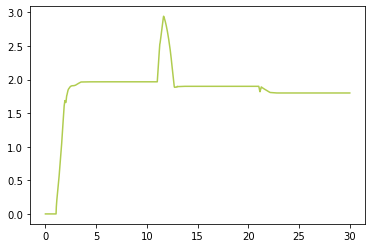

In [16]:
plt.plot(valve_time, valve_volumeflow, ls=ls, color=c)
plt.show()